In [4]:
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# assign the 30 features to a NumPy array X. 
# Using Sklearn's LabelEncoder to transform the class labels from their original string representation (M and B) into integers.
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
Y = df.loc[:, 1].values
label_en = LabelEncoder()
y = label_en.fit_transform(Y)
# After encoding the class labels (diagnosis) in an array y, the malignant tumors are now represented as class 1, and the benign tumors are represented as class 0, respectively

In [9]:
y[0:5] # check the results

array([1, 1, 1, 1, 1], dtype=int64)

In [10]:
# divide the dataset into a separate training dataset (80 percent of the data)
# and a separate test dataset (20 percent of the data):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
# Using Sklearn's Pipeline function to combining features transformers and estimators; 
# It consisted of two intermediate steps, a StandardScaler and a PCA transformer, and a Decision tree classifier as a final estimator.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Initiate a decision tress pipeline with "gini" and other default parameter
# 1. Check performance of decision tree algorithm without feature thransformation of StandardScaler and a PCA transformer
pipe_dt_1 = Pipeline([('clf', DecisionTreeClassifier(criterion='gini', random_state=2))])
pipe_dt_1.fit(X_train, y_train)
print('Decision tree (w/o transformation) Test Accuracy: %.3f' % pipe_dt_1.score(X_test, y_test)) 

# 2. Check performance of decision tree algorithm with feature thransformation of StandardScaler and a PCA transformer
pipe_dt_2 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', DecisionTreeClassifier(criterion='gini', random_state=2))])
pipe_dt_2.fit(X_train, y_train)
print('Decision tree (with scaler/PCA) Test Accuracy: %.3f' % pipe_dt_2.score(X_test, y_test))  

# 3. Check performance of decision tree algorithm with StandardScaler only.
pipe_dt_3 = Pipeline([('scl', StandardScaler()), ('clf', DecisionTreeClassifier(criterion='gini', random_state=2))])
pipe_dt_3.fit(X_train, y_train)
print('Decision tree (with scaler only) Test Accuracy: %.3f' % pipe_dt_3.score(X_test, y_test))

Decision tree (w/o transformation) Test Accuracy: 0.930
Decision tree (with scaler/PCA) Test Accuracy: 0.921
Decision tree (with scaler only) Test Accuracy: 0.930


In [12]:
# Using stratified k-fold cross-validation to assess model performance
import numpy as np
from sklearn.cross_validation import cross_val_score
n = 0
for estimator in [pipe_dt_1, pipe_dt_2, pipe_dt_3]:
    name = 'pipe_dt_{}'.format(n+1)
    scores = cross_val_score(estimator=estimator, X=X_train, y=y_train, cv=10, n_jobs=1)
    print('%s Cross_validation accuracy scores: %s' % (name, scores))
    print('%s Cross_validation accuracy: %.3f +/- %.3f' % (name, np.mean(scores), np.std(scores)))
    n += 1

# Based on the accuracy scores, the pipline pipe_dt_3 has the best performace, so it was picked for downstream analysis.

pipe_dt_1 Cross_validation accuracy scores: [ 0.97826087  0.95652174  0.86956522  0.93478261  0.93478261  1.
  0.95555556  0.95555556  0.93333333  0.95555556]
pipe_dt_1 Cross_validation accuracy: 0.947 +/- 0.033
pipe_dt_2 Cross_validation accuracy scores: [ 0.89130435  0.93478261  0.97826087  0.86956522  0.93478261  1.
  0.97777778  0.91111111  0.97777778  0.95555556]
pipe_dt_2 Cross_validation accuracy: 0.943 +/- 0.040
pipe_dt_3 Cross_validation accuracy scores: [ 0.97826087  0.95652174  0.86956522  0.93478261  0.93478261  1.
  0.95555556  0.95555556  0.93333333  0.95555556]
pipe_dt_3 Cross_validation accuracy: 0.947 +/- 0.033


C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


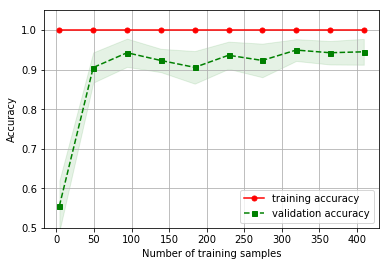

In [13]:
# Debugging algorithms with learning and validation curves
# use learning curves to diagnose if a learning algorithm has a problem with overfitting (high variance) or underfitting (high bias).
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_dt_3, X=X_train, y=y_train, 
                                                       train_sizes=np.linspace(0.01, 1.0, 10),
                                                       cv=10, n_jobs=1)
# calculate the average accuracies from the returned cross-validated training 
# and test scores for the different sizes of the training set, which we plotted using matplotlib's plot function.
# print(train_scores)
train_mean = np.mean(train_scores, axis=1)
# print(train_mean)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.05])
plt.show()

In [14]:
# Debugging algorithms with learning and validation curves
# use learning curves to diagnose if a learning algorithm has a problem with overfitting (high variance) or underfitting (high bias).
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.01, 1.0, 10), cv=10, n_jobs=1, ylim=[0.5, 1.05]):
    '''
    
    :param estimator: 
    :param X: 
    :param y: 
    :param train_sizes: 
    :param cv: 
    :param n_jobs: 
    :return: 
    '''

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, n_jobs=n_jobs)
    # calculate the average accuracies from the returned cross-validated training
    # and test scores for the different sizes of the training set, which we plotted using matplotlib's plot function.
    # print(train_scores)
    train_mean = np.mean(train_scores, axis=1)
    print(train_mean)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean - train_std,
                         train_mean + train_std, alpha=0.1,
                         color="r")
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(train_sizes, test_mean - test_std,
                         test_mean + test_std, alpha=0.1, color="g")
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim(ylim)
    plt.show()

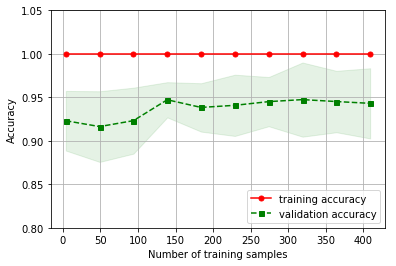

In [15]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_dt_2, X=X_train, y=y_train, 
                                                       train_sizes=np.linspace(0.01, 1.0, 10),
                                                       cv=10, n_jobs=1)
# calculate the average accuracies from the returned cross-validated training 
# and test scores for the different sizes of the training set, which we plotted using matplotlib's plot function.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.05])
plt.show()

C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


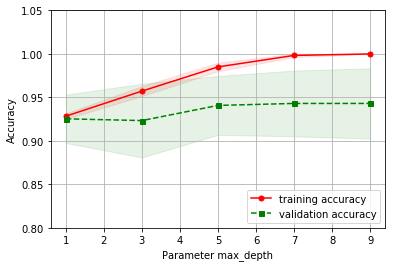

In [16]:
# Addressing overfitting and underfitting with validation curves
from sklearn.learning_curve import validation_curve
# testing max_depth between 1 and 9 (1, 3, 5, 7, 9).
param_range = range(1, 11, 2)
train_scores, test_scores = validation_curve(estimator=pipe_dt_2, X=X_train, y=y_train, 
                                                       param_name='clf__max_depth',
                                                       param_range=param_range,
                                                       cv=10)
# calculate the average accuracies from the returned cross-validated training 
# and test scores for the different values of the model parameters, which we plotted using matplotlib's plot function.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='red', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
plt.grid()
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.05])
plt.show()

In [17]:
pipe_dt_2.get_params().keys()

dict_keys(['clf__criterion', 'steps', 'clf__presort', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__max_features', 'pca', 'clf__random_state', 'pca__svd_solver', 'scl__copy', 'pca__iterated_power', 'pca__whiten', 'scl', 'clf__min_impurity_split', 'pca__copy', 'clf__splitter', 'pca__tol', 'pca__n_components', 'clf__class_weight', 'scl__with_std', 'scl__with_mean', 'pca__random_state', 'clf__max_leaf_nodes', 'clf', 'clf__max_depth', 'clf__min_samples_leaf'])

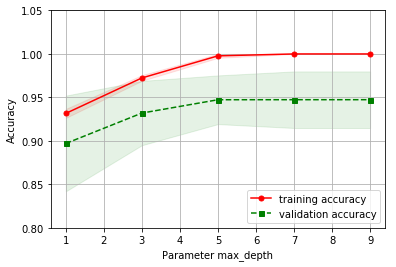

In [18]:
# Addressing overfitting and underfitting with validation curves
from sklearn.learning_curve import validation_curve
# testing max_depth between 1 and 9 (1, 3, 5, 7, 9).
param_range = range(1, 11, 2)
train_scores, test_scores = validation_curve(estimator=pipe_dt_3, X=X_train, y=y_train, 
                                                       param_name='clf__max_depth',
                                                       param_range=param_range,
                                                       cv=10)
# calculate the average accuracies from the returned cross-validated training 
# and test scores for the different values of the model parameters, which we plotted using matplotlib's plot function.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='red', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
plt.grid()
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.05])
plt.show()

In [19]:
# Fine-tuning machine learning models using scikit-learn's Randomized Search and Grid Search
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# specify parameters and distributions to sample from
# param_dist = {"clf__max_depth": [1, 3, 5, 7, 9, None],
#               }

# run randomized search
# n_iter_search = 20
# random_search = RandomizedSearchCV(pipe_dt_2, param_distributions=param_dist,
#                                    n_iter=n_iter_search, scoring='accuracy', cv=10, n_jobs=-1)

# start = time()
# random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), n_iter_search))
# report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"clf__max_depth": [5],
              'clf__min_impurity_split': [0, 0.1, 0.2, 0.3, 0.4]
              }

# run grid search
grid_search = GridSearchCV(pipe_dt_2, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 25.82 seconds for 5 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.941 (std: 0.034)
Parameters: {'clf__min_impurity_split': 0, 'clf__max_depth': 5}

Model with rank: 2
Mean validation score: 0.925 (std: 0.028)
Parameters: {'clf__max_depth': 5, 'clf__min_impurity_split': 0.2}

Model with rank: 2
Mean validation score: 0.925 (std: 0.028)
Parameters: {'clf__min_impurity_split': 0.3, 'clf__max_depth': 5}

Model with rank: 2
Mean validation score: 0.925 (std: 0.028)
Parameters: {'clf__min_impurity_split': 0.4, 'clf__max_depth': 5}



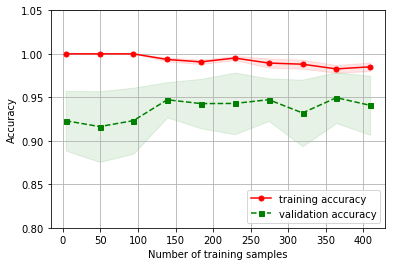

In [20]:
# Debugging algorithms with learning and validation curves for model pipe_dt_4
# use learning curves to diagnose if a learning algorithm has a problem with overfitting (high variance) or underfitting (high bias).
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_dt_4 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), 
                      ('clf', DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state=2))])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_dt_4, X=X_train, y=y_train, 
                                                       train_sizes=np.linspace(0.01, 1.0, 10),
                                                       cv=10, n_jobs=1)
# calculate the average accuracies from the returned cross-validated training 
# and test scores for the different sizes of the training set, which we plotted using matplotlib's plot function.
# print(train_scores)
train_mean = np.mean(train_scores, axis=1)
# print(train_mean)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.05])
plt.show()

114
[[66  6]
 [ 3 39]]


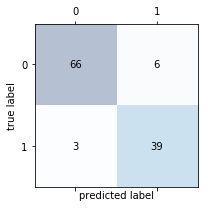

Precision: 0.867
Recall: 0.929
F1: 0.897
ROC AUC: 0.923
Accuracy: 0.921
             precision    recall  f1-score   support

          0       0.96      0.92      0.94        72
          1       0.87      0.93      0.90        42

avg / total       0.92      0.92      0.92       114



In [50]:
# Looking at different performance evaluation metrics in testing data set：confusion matrix, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pipe_dt_4.fit(X_train, y_train)
y_pred = pipe_dt_4.predict(X_test)
print(len(y_pred))
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
          s=confmat[i, j],
          va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

print(metrics.classification_report(y_test, y_pred))

Querying with the best model took 0.001002 seconds.
114
[[66  6]
 [ 3 39]]


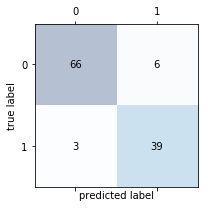

Precision: 0.867
Recall: 0.929
F1: 0.897
ROC AUC: 0.923
Accuracy: 0.921
-----------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.92      0.94        72
          1       0.87      0.93      0.90        42

avg / total       0.92      0.92      0.92       114



In [78]:
evaluation(pipe_dt_4, X_test, y_test)

[ 1.          1.          1.          0.99352518  0.99076087  0.99519651
  0.98941606  0.98808777  0.98269231  0.98508557]


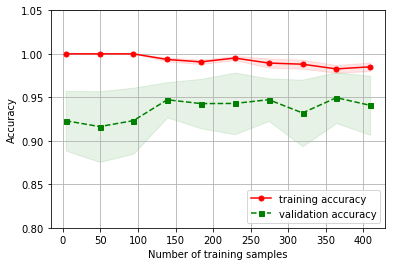

In [22]:
plot_learning_curve(pipe_dt_4, X=X_train, y=y_train, ylim=[0.8, 1.05])

In [30]:
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
import numpy as np

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


def find_best_model(estimator, X_train, y_train, param_grid, scoring='accuracy', cv=10, n_jobs=-1):

    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=-1)
    start = time()

    grid_search.fit(X_train, y_train)

    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_['params'])))
    report(grid_search.cv_results_)

    # scores = cross_val_score(grid_search, X_train, y_train, scoring=scoring, cv=cv)
    # print('Nested_Cross_validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

    # Select the best model from grid_search
    clf = grid_search.best_estimator_

    start2 = time()

    # Train using the best model
    clf.fit(X_train, y_train)

    print("Training with the best model took %f seconds." % (time() - start2))

    return clf

In [24]:
param_grid = {"clf__max_depth": [1, 3, 5, 7, 9, None],}
model = find_best_model(pipe_dt_2, X_train, y_train, param_grid=param_grid)

GridSearchCV took 26.06 seconds for 6 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.925 (std: 0.026)
Parameters: {'clf__max_depth': 5}

Model with rank: 2
Mean validation score: 0.923 (std: 0.030)
Parameters: {'clf__max_depth': 3}

Model with rank: 2
Mean validation score: 0.923 (std: 0.030)
Parameters: {'clf__max_depth': 7}

Training with the best model took 0.011028 seconds.


In [40]:
# Addressing overfitting and underfitting with validation curves
from sklearn.learning_curve import validation_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_validation_curve(estimator, X, y, param_name, param_range, x_label, ylim=[0.5, 1.05], cv=10, scoring="accuracy", n_jobs=1):


    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv, scoring, n_jobs)
    # calculate the average accuracies from the returned cross-validated training
    # and test scores for the different values of the model parameters, which we plotted using matplotlib's plot function.
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, color='red', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(param_range, train_mean - train_std,
                         train_mean + train_std, alpha=0.1,
                         color="r")
    plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(param_range, test_mean - test_std,
                         test_mean + test_std, alpha=0.1, color="g")
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim(ylim)

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

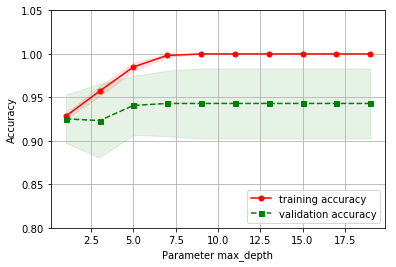

In [26]:
param_name = 'clf__max_depth'
param_range = range(1, 21, 2)
plot_validation_curve(pipe_dt_4, X_train, y_train, param_name, param_range, [0.8, 1.05])

In [28]:
# Step 1: initiate pipeline and hyperparameter tunning and model selection

from sklearn.ensemble import AdaBoostClassifier
# Initiate a pipeline (base model) with a StandardScaler, a PCA transformer, 
# and a Adaboost classifier using a decision tress stump with "gini" and other default parameter
pipe_ada_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini'), 
                    random_state=2))])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_ada_1, X=X_train, y=y_train, cv=10, n_jobs=1)
print('pipe_ada_1 Cross_validation accuracy scores: %s' % (scores))
print('pipe_ada_1 Cross_validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_ada_1 Cross_validation accuracy scores: [ 0.84782609  0.93478261  0.97826087  0.89130435  0.93478261  1.
  0.97777778  0.91111111  0.97777778  0.95555556]
pipe_ada_1 Cross_validation accuracy: 0.941 +/- 0.045


In [35]:
# Tuning parameters: 
# (1) n_estimators : integer, optional (default=50), we choose to tune from 20-80;
# The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
# (2) ada__base_estimator__max_depth: [1, 3, 5, 7, 9]
# (3) ada__learning_rate
param_grid = {"ada__n_estimators": range(50,501,50),
              "ada__base_estimator__max_depth": [1, 5, 9, 13, 17],
              "ada__learning_rate": [0.001, 0.01, 0.3, 0.5, 1.0]
             }
pipe_ada_2 = find_best_model(pipe_ada_1, X_train, y_train, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

GridSearchCV took 105.44 seconds for 250 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.956 (std: 0.031)
Parameters: {'ada__base_estimator__max_depth': 5, 'ada__n_estimators': 100, 'ada__learning_rate': 0.3}

Model with rank: 1
Mean validation score: 0.956 (std: 0.031)
Parameters: {'ada__base_estimator__max_depth': 5, 'ada__n_estimators': 150, 'ada__learning_rate': 0.3}

Model with rank: 1
Mean validation score: 0.956 (std: 0.031)
Parameters: {'ada__base_estimator__max_depth': 5, 'ada__n_estimators': 200, 'ada__learning_rate': 0.3}

Model with rank: 1
Mean validation score: 0.956 (std: 0.031)
Parameters: {'ada__base_estimator__max_depth': 5, 'ada__n_estimators': 250, 'ada__learning_rate': 0.3}

Model with rank: 1
Mean validation score: 0.956 (std: 0.031)
Parameters: {'ada__base_estimator__max_depth': 5, 'ada__n_estimators': 300, 'ada__learning_rate': 0.3}

Model with rank: 1
Mean validation score: 0.956 (std: 0.031)
Parameters: {'ada__base_estimator__max_dept

In [29]:
pipe_ada_1.get_params().keys()

dict_keys(['steps', 'ada__base_estimator__max_leaf_nodes', 'pca', 'pca__svd_solver', 'ada__n_estimators', 'ada__base_estimator__random_state', 'ada__base_estimator', 'ada__base_estimator__criterion', 'ada__algorithm', 'pca__iterated_power', 'pca__whiten', 'scl', 'ada__base_estimator__min_samples_split', 'ada__base_estimator__min_samples_leaf', 'scl__copy', 'ada', 'ada__base_estimator__max_depth', 'ada__random_state', 'pca__tol', 'pca__n_components', 'scl__with_std', 'scl__with_mean', 'ada__base_estimator__max_features', 'ada__base_estimator__class_weight', 'pca__copy', 'pca__random_state', 'ada__base_estimator__min_weight_fraction_leaf', 'ada__base_estimator__min_impurity_split', 'ada__base_estimator__presort', 'ada__base_estimator__splitter', 'ada__learning_rate'])

In [36]:
# The best model
pipe_ada_2

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ada', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(cla...andom_state=None, splitter='best'),
          learning_rate=0.3, n_estimators=100, random_state=2))])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

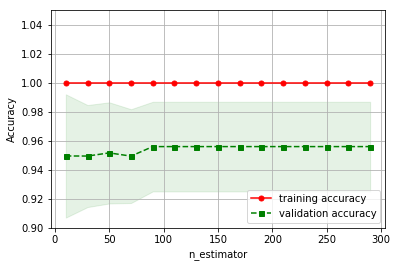

In [42]:
param_name = 'ada__n_estimators'
param_range = range(10,301,20)
plot_validation_curve(pipe_ada_2, X_train, y_train, param_name, param_range, "n_estimator", [0.9, 1.05])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

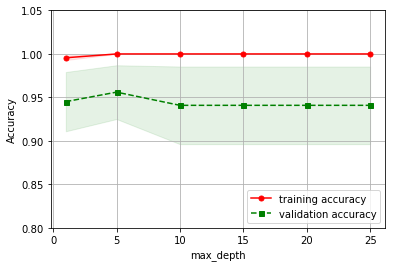

In [45]:
param_name = 'ada__base_estimator__max_depth'
param_range = [1, 5, 10, 15, 20, 25]
plot_validation_curve(pipe_ada_2, X_train, y_train, param_name, param_range, "max_depth", [0.80, 1.05])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

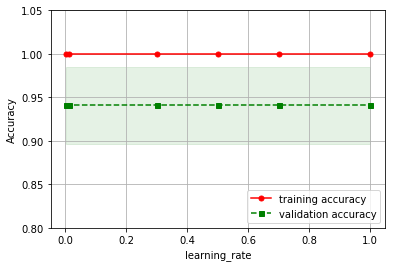

In [46]:
param_name = 'ada__learning_rate'
param_range = [0.001, 0.01, 0.3, 0.5, 0.7, 1.0]
plot_validation_curve(pipe_ada_2, X_train, y_train, param_name, param_range, "learning_rate", [0.80, 1.05])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


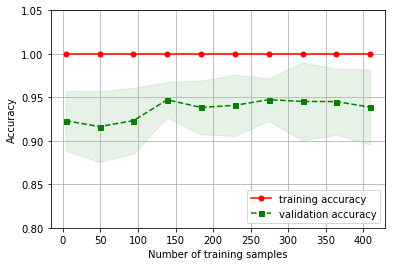

In [47]:
plot_learning_curve(pipe_ada_2, X=X_train, y=y_train, ylim=[0.8, 1.05])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

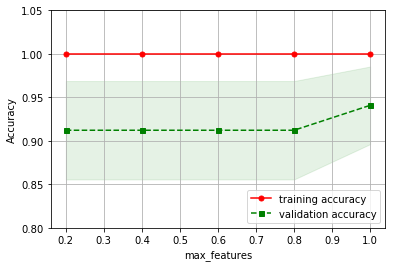

In [48]:
param_name = 'ada__base_estimator__max_features'
param_range = [0.20, 0.40, 0.60, 0.80, 1.0]
plot_validation_curve(pipe_ada_2, X_train, y_train, param_name, param_range, "max_features", [0.80, 1.05])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

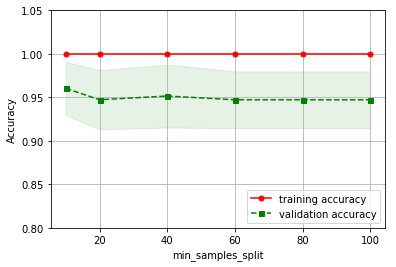

In [49]:
param_name = 'ada__base_estimator__min_samples_split'
param_range = [10, 20, 40, 60, 80, 100]
plot_validation_curve(pipe_ada_2, X_train, y_train, param_name, param_range, "min_samples_split", [0.80, 1.05])

In [75]:
# %load evaluation.py
# Looking at different performance evaluation metrics in testing data set：confusion matrix, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from time import time


def evaluation(estimator, X_test, y_test):

    start = time()
    y_pred = estimator.predict(X_test)
    print("Querying with the best model took %f seconds." % (time() - start))
    print(len(y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
    print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
    print('-----------------------------------------')
    print(metrics.classification_report(y_test, y_pred))

Querying with the best model took 0.034090 seconds.
114
[[71  1]
 [ 4 38]]


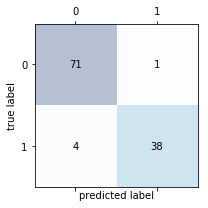

Precision: 0.974
Recall: 0.905
F1: 0.938
ROC AUC: 0.945
Accuracy: 0.956
-----------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97        72
          1       0.97      0.90      0.94        42

avg / total       0.96      0.96      0.96       114



In [76]:
evaluation(pipe_ada_2, X_test, y_test)

In [58]:
# Step 1: initiate pipeline and hyperparameter tunning and model selection

from sklearn.neighbors import KNeighborsClassifier
# Initiate a pipeline (base model) with a StandardScaler, a PCA transformer, 
# and a KNeighborsClassifier using default parameter
pipe_knn_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('knn', KNeighborsClassifier())])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_knn_1, X=X_train, y=y_train, cv=10, n_jobs=1)
print('pipe_knn_1 Cross_validation accuracy scores: %s' % (scores))
print('pipe_knn_1 Cross_validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_knn_1 Cross_validation accuracy scores: [ 0.86956522  1.          0.95652174  0.89130435  0.89130435  0.97777778
  0.91111111  0.91111111  0.97777778  0.95555556]
pipe_knn_1 Cross_validation accuracy: 0.934 +/- 0.042


In [63]:
# Tuning parameters: 
# (1) n_neighbors : int, optional (default = 5), Number of neighbors to use by default for kneighbors queries
# (2) weights : str or callable, optional (default = ‘uniform’)
# weight function used in prediction. Possible values:
# ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
# ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
# [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
# (3) metric : string or callable, default ‘minkowski’, 'knn__metric': ["euclidean", "manhattan", "minkowski"]
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.
param_grid = {"knn__n_neighbors": np.arange(1, 31, 2), "knn__weights": ['uniform', 'distance']}
pipe_knn_2 = find_best_model(pipe_knn_1, X_train, y_train, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
              

GridSearchCV took 7.37 seconds for 30 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.949 (std: 0.028)
Parameters: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

Model with rank: 2
Mean validation score: 0.945 (std: 0.026)
Parameters: {'knn__n_neighbors': 15, 'knn__weights': 'uniform'}

Model with rank: 3
Mean validation score: 0.943 (std: 0.028)
Parameters: {'knn__n_neighbors': 11, 'knn__weights': 'uniform'}

Model with rank: 3
Mean validation score: 0.943 (std: 0.033)
Parameters: {'knn__n_neighbors': 19, 'knn__weights': 'distance'}

Training with the best model took 0.002007 seconds.


In [61]:
pipe_knn_1.get_params().keys()


dict_keys(['steps', 'knn__metric_params', 'pca', 'pca__whiten', 'pca__svd_solver', 'scl__copy', 'pca__iterated_power', 'knn__weights', 'scl', 'knn__p', 'knn__metric', 'knn__leaf_size', 'pca__copy', 'knn__n_jobs', 'knn__algorithm', 'pca__tol', 'pca__n_components', 'scl__with_std', 'scl__with_mean', 'pca__random_state', 'knn', 'knn__n_neighbors'])

In [64]:
param_grid = {"knn__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'], 'knn__metric': ["euclidean", "manhattan", "minkowski"]}
pipe_knn_3 = find_best_model(pipe_knn_2, X_train, y_train, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

GridSearchCV took 28.63 seconds for 12 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.949 (std: 0.028)
Parameters: {'knn__metric': 'euclidean', 'knn__algorithm': 'auto'}

Model with rank: 1
Mean validation score: 0.949 (std: 0.028)
Parameters: {'knn__metric': 'minkowski', 'knn__algorithm': 'auto'}

Model with rank: 1
Mean validation score: 0.949 (std: 0.028)
Parameters: {'knn__metric': 'euclidean', 'knn__algorithm': 'ball_tree'}

Model with rank: 1
Mean validation score: 0.949 (std: 0.028)
Parameters: {'knn__metric': 'minkowski', 'knn__algorithm': 'ball_tree'}

Model with rank: 1
Mean validation score: 0.949 (std: 0.028)
Parameters: {'knn__metric': 'euclidean', 'knn__algorithm': 'kd_tree'}

Model with rank: 1
Mean validation score: 0.949 (std: 0.028)
Parameters: {'knn__metric': 'minkowski', 'knn__algorithm': 'kd_tree'}

Model with rank: 1
Mean validation score: 0.949 (std: 0.028)
Parameters: {'knn__metric': 'euclidean', 'knn__algorithm': 'brute'}

Model with 

In [65]:
pipe_knn_3

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform'))])

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

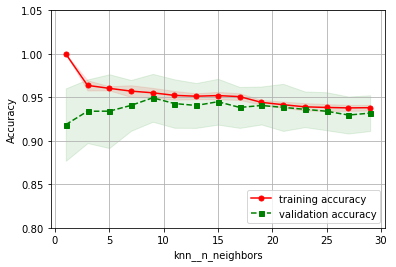

In [67]:
param_name = 'knn__n_neighbors'
param_range = np.arange(1, 31, 2)
plot_validation_curve(pipe_knn_3, X_train, y_train, param_name, param_range, "knn__n_neighbors", [0.8, 1.05])

[ 0.7925      0.93209877  0.92213115  0.93435583  0.93235294  0.93346939
  0.93251748  0.93272171  0.93423913  0.93789731]


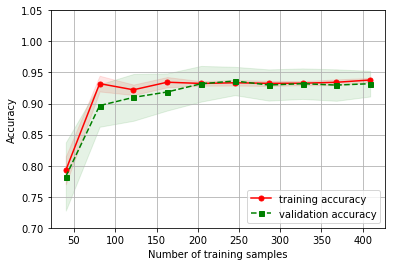

In [71]:
plot_learning_curve(pipe_knn_3, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), ylim=[0.7, 1.05])

Querying with the best model took 0.001995 seconds.
114
[[70  2]
 [ 6 36]]


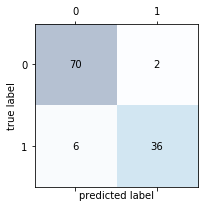

Precision: 0.947
Recall: 0.857
F1: 0.900
ROC AUC: 0.915
Accuracy: 0.930
-----------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.97      0.95        72
          1       0.95      0.86      0.90        42

avg / total       0.93      0.93      0.93       114



In [77]:
evaluation(pipe_knn_3, X_test, y_test)

In [79]:
# Step 1: initiate pipeline and hyperparameter tunning and model selection

from sklearn.svm import SVC
# Initiate a pipeline (base model) with a StandardScaler, a PCA transformer, 
# and a C-Support Vector Classification using default parameter
pipe_svc_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('svc', SVC(random_state=2))])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_svc_1, X=X_train, y=y_train, cv=10, n_jobs=1)
print('pipe_knn_1 Cross_validation accuracy scores: %s' % (scores))
print('pipe_knn_1 Cross_validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_knn_1 Cross_validation accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.91304348  0.97777778
  0.91111111  0.95555556  0.97777778  0.95555556]
pipe_knn_1 Cross_validation accuracy: 0.945 +/- 0.033


In [80]:
pipe_svc_1.get_params().keys()

dict_keys(['svc', 'svc__cache_size', 'svc__gamma', 'steps', 'scl__with_std', 'svc__coef0', 'svc__decision_function_shape', 'pca__svd_solver', 'svc__max_iter', 'scl__copy', 'pca__iterated_power', 'pca__whiten', 'scl', 'svc__kernel', 'svc__C', 'svc__shrinking', 'pca__copy', 'svc__degree', 'pca__tol', 'pca__n_components', 'svc__random_state', 'scl__with_mean', 'svc__class_weight', 'svc__probability', 'pca__random_state', 'pca', 'svc__tol', 'svc__verbose'])

In [82]:
# Tuning parameters: 
# (1) svc__gamma : float, optional (default=’auto’)
# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.
# (2) svc__C :  float, optional (default=1.0); Penalty parameter C of the error term.
# (3) svc__kernel : Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
# or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; 
# that matrix should be an array of shape (n_samples, n_samples).
# Reference: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

param_grid = {'svc__C': np.logspace(-2, 10, 13), 'svc__gamma': np.logspace(-9, 3, 13)}
pipe_svc_2 = find_best_model(pipe_svc_1, X_train, y_train, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

GridSearchCV took 417.73 seconds for 169 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.954 (std: 0.028)
Parameters: {'svc__C': 10000000.0, 'svc__gamma': 1e-08}

Model with rank: 1
Mean validation score: 0.954 (std: 0.028)
Parameters: {'svc__C': 100000000.0, 'svc__gamma': 9.9999999999999995e-08}

Model with rank: 1
Mean validation score: 0.954 (std: 0.033)
Parameters: {'svc__C': 100000000.0, 'svc__gamma': 9.9999999999999995e-07}

Model with rank: 1
Mean validation score: 0.954 (std: 0.026)
Parameters: {'svc__C': 1000000000.0, 'svc__gamma': 9.9999999999999995e-08}

Training with the best model took 0.005013 seconds.


In [83]:
scores = grid.cv_results_['mean_test_score'].reshape(len(np.logspace(-2, 10, 13)),
                                                     len(np.logspace(-9, 3, 13)))

NameError: name 'grid' is not defined

In [97]:
pipe_svc_2 

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1000.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=2, shrinking=True,
  tol=0.001, verbose=False))])

In [106]:
pipe_svc_2 = Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=10000000.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-08, kernel='rbf',
  max_iter=-1, probability=False, random_state=2, shrinking=True,
  tol=0.001, verbose=False))])

In [85]:
param_grid = {'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
pipe_svc_1_2 = find_best_model(pipe_svc_1, X_train, y_train, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

GridSearchCV took 10.51 seconds for 4 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.947 (std: 0.028)
Parameters: {'svc__kernel': 'linear'}

Model with rank: 2
Mean validation score: 0.945 (std: 0.033)
Parameters: {'svc__kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.930 (std: 0.035)
Parameters: {'svc__kernel': 'poly'}

Training with the best model took 0.006016 seconds.


In [86]:
param_grid = {'svc__kernel': ['linear', 'rbf'], 'svc__C': np.logspace(-2, 10, 13), 'svc__gamma': np.logspace(-9, 3, 13)}
pipe_svc_3 = find_best_model(pipe_svc_1, X_train, y_train, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

GridSearchCV took 9592.88 seconds for 338 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.954 (std: 0.028)
Parameters: {'svc__C': 10000000.0, 'svc__kernel': 'rbf', 'svc__gamma': 1e-08}

Model with rank: 1
Mean validation score: 0.954 (std: 0.028)
Parameters: {'svc__C': 100000000.0, 'svc__kernel': 'rbf', 'svc__gamma': 9.9999999999999995e-08}

Model with rank: 1
Mean validation score: 0.954 (std: 0.033)
Parameters: {'svc__C': 100000000.0, 'svc__kernel': 'rbf', 'svc__gamma': 9.9999999999999995e-07}

Model with rank: 1
Mean validation score: 0.954 (std: 0.026)
Parameters: {'svc__C': 1000000000.0, 'svc__kernel': 'rbf', 'svc__gamma': 9.9999999999999995e-08}

Training with the best model took 0.004011 seconds.


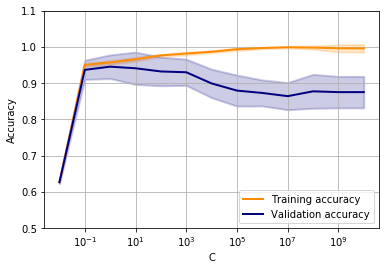

In [90]:
# Validation curve of C for pipe_svc_1
param_name = 'svc__C'
param_range = np.logspace(-2, 10, 13)
train_scores, test_scores = validation_curve(
    pipe_svc_1, X=X_train, y=y_train, param_name=param_name, param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training accuracy",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Validation accuracy",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc='lower right')
plt.grid()
plt.show()

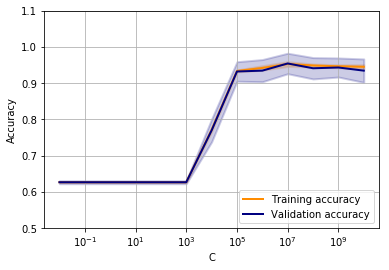

In [101]:
# Validation curve of C for pipe_svc_2
param_name = 'svc__C'
param_range = np.logspace(-2, 10, 13)
train_scores, test_scores = validation_curve(
    pipe_svc_2, X=X_train, y=y_train, param_name=param_name, param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training accuracy",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Validation accuracy",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc='lower right')
plt.grid()
plt.show()

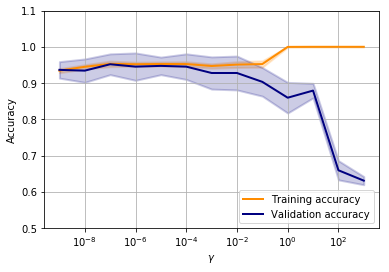

In [91]:
# Validation curve of gamma for pipe_svc_1
param_name = 'svc__gamma'
param_range = np.logspace(-9, 3, 13)
train_scores, test_scores = validation_curve(
    pipe_svc_1, X=X_train, y=y_train, param_name=param_name, param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training accuracy",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Validation accuracy",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc='lower right')
plt.grid()
plt.show()

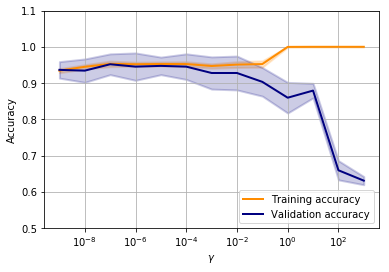

In [102]:
param_name = 'svc__gamma'
param_range = np.logspace(-9, 3, 13)
train_scores, test_scores = validation_curve(
    pipe_svc_2, X=X_train, y=y_train, param_name=param_name, param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training accuracy",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Validation accuracy",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc='lower right')
plt.grid()
plt.show()

[ 0.9525      0.95679012  0.93770492  0.93067485  0.93382353  0.93428571
  0.93531469  0.94556575  0.94293478  0.94889976]


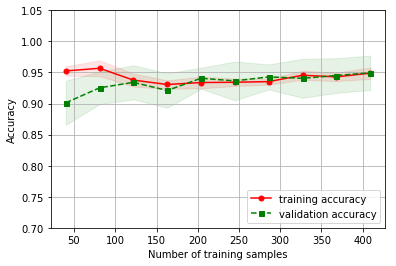

In [100]:
plot_learning_curve(pipe_svc_2, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), ylim=[0.7, 1.05])

Querying with the best model took 0.001032 seconds.
114
[[71  1]
 [ 5 37]]


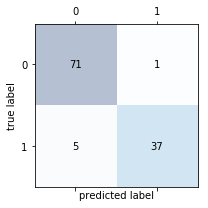

Precision: 0.974
Recall: 0.881
F1: 0.925
ROC AUC: 0.934
Accuracy: 0.947
-----------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96        72
          1       0.97      0.88      0.93        42

avg / total       0.95      0.95      0.95       114



In [109]:
pipe_svc_2.fit(X_train, y_train)
evaluation(pipe_svc_2, X_test, y_test)

Querying with the best model took 0.004982 seconds.
114
[[72  0]
 [41  1]]


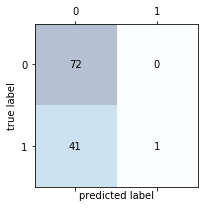

Precision: 1.000
Recall: 0.024
F1: 0.047
ROC AUC: 0.512
Accuracy: 0.640
-----------------------------------------
             precision    recall  f1-score   support

          0       0.64      1.00      0.78        72
          1       1.00      0.02      0.05        42

avg / total       0.77      0.64      0.51       114



In [104]:
evaluation(pipe_svc_1, X_test, y_test)

In [108]:
pipe_svc_2


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=10000000.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-08, kernel='rbf',
  max_iter=-1, probability=False, random_state=2, shrinking=True,
  tol=0.001, verbose=False))])

In [110]:
# Step 1: initiate pipeline and hyperparameter tunning and model selection

from sklearn.neural_network import MLPClassifier
# Initiate a pipeline (base model) with a StandardScaler, a PCA transformer, 
# and a Multi-layer Perceptron classifier using default parameter
pipe_nn_1 = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),  
                    ('nn', MLPClassifier(random_state=2))])

# Using stratified k-fold cross-validation to assess base model performance
scores = cross_val_score(estimator=pipe_nn_1, X=X_train, y=y_train, cv=10, n_jobs=1)
print('pipe_nn_1 Cross_validation accuracy scores: %s' % (scores))
print('pipe_nn_1 Cross_validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

pipe_nn_1 Cross_validation accuracy scores: [ 0.84782609  0.95652174  0.97826087  0.91304348  0.93478261  1.
  0.93333333  0.95555556  0.97777778  0.95555556]
pipe_nn_1 Cross_validation accuracy: 0.945 +/- 0.040


In [113]:
pipe_nn_1.get_params().keys()

dict_keys(['steps', 'nn__hidden_layer_sizes', 'nn__max_iter', 'pca', 'nn__activation', 'nn__solver', 'pca__svd_solver', 'nn__random_state', 'nn__epsilon', 'nn__nesterovs_momentum', 'scl__copy', 'nn__momentum', 'nn__beta_2', 'nn__verbose', 'nn__early_stopping', 'pca__iterated_power', 'pca__whiten', 'scl', 'nn__batch_size', 'pca__copy', 'nn__beta_1', 'pca__tol', 'pca__n_components', 'scl__with_std', 'nn__tol', 'nn__learning_rate_init', 'nn__learning_rate', 'scl__with_mean', 'nn__alpha', 'nn__shuffle', 'nn', 'nn__power_t', 'nn__warm_start', 'nn__validation_fraction', 'pca__random_state'])

In [114]:
# Tuning parameters: 
# (1) first tune which solver is best suited for this data set. 

param_grid_nn2 = {'nn__solver': ['lbfgs', 'sgd', 'adam']}
pipe_nn_2 = find_best_model(pipe_nn_1, X_train, y_train, param_grid=param_grid_nn1, scoring='accuracy', cv=10, n_jobs=-1)

GridSearchCV took 26.51 seconds for 3 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.945 (std: 0.040)
Parameters: {'nn__solver': 'adam'}

Model with rank: 2
Mean validation score: 0.941 (std: 0.026)
Parameters: {'nn__solver': 'sgd'}

Model with rank: 3
Mean validation score: 0.930 (std: 0.035)
Parameters: {'nn__solver': 'lbfgs'}

Training with the best model took 0.161431 seconds.


In [115]:
# Adam solver is the best for this data set.
# Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets. 
# For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives 
# pretty good performance. SGD with momentum or nesterov’s momentum, on the other hand, can perform 
# better than those two algorithms if learning rate is correctly tuned.

pipe_nn_2 


Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('nn', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

In [117]:
# Tuning parameters: 
# (2) tune which solver is best suited for this data set.

param_grid_nn3 = {'nn__activation': ['identity', 'logistic', 'tanh', 'relu']}
pipe_nn_3 = find_best_model(pipe_nn_2, X_train, y_train, param_grid=param_grid_nn3, scoring='accuracy', cv=10, n_jobs=-1)

GridSearchCV took 26.12 seconds for 4 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.945 (std: 0.031)
Parameters: {'nn__activation': 'identity'}

Model with rank: 1
Mean validation score: 0.945 (std: 0.040)
Parameters: {'nn__activation': 'relu'}

Model with rank: 3
Mean validation score: 0.941 (std: 0.039)
Parameters: {'nn__activation': 'tanh'}

Training with the best model took 0.067180 seconds.


In [118]:
pipe_nn_3

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('nn', MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, bet...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

In [120]:
# Tuning parameters: 
# (3) Tune Batch Size and Number of Epochs.

param_grid_nn4 = {'nn__batch_size': [10, 20, 40, 60, 100, 200], 'nn__max_iter': [10, 100, 200, 400, 600, 1000]}
pipe_nn_4 = find_best_model(pipe_nn_3, X_train, y_train, param_grid=param_grid_nn4, scoring='accuracy', cv=10, n_jobs=-1)



GridSearchCV took 29.83 seconds for 36 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__batch_size': 10, 'nn__max_iter': 100}

Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__batch_size': 10, 'nn__max_iter': 200}

Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__batch_size': 10, 'nn__max_iter': 400}

Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__batch_size': 10, 'nn__max_iter': 600}

Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__batch_size': 10, 'nn__max_iter': 1000}

Training with the best model took 0.149399 seconds.


In [121]:
# Tuning parameters: 
# (4) Tune the Number of Neurons in the Hidden Layer.

param_grid_nn5 = {'nn__hidden_layer_sizes': [1, 5, 20, 60, 100, 140, 180]}
pipe_nn_5 = find_best_model(pipe_nn_4, X_train, y_train, param_grid=param_grid_nn5, scoring='accuracy', cv=10, n_jobs=-1)

# It can be confirm that default hidden layer size of 100 is good to pick.

GridSearchCV took 25.72 seconds for 7 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__hidden_layer_sizes': 100}

Model with rank: 2
Mean validation score: 0.949 (std: 0.024)
Parameters: {'nn__hidden_layer_sizes': 1}

Model with rank: 2
Mean validation score: 0.949 (std: 0.029)
Parameters: {'nn__hidden_layer_sizes': 5}

Model with rank: 2
Mean validation score: 0.949 (std: 0.029)
Parameters: {'nn__hidden_layer_sizes': 20}

Model with rank: 2
Mean validation score: 0.949 (std: 0.029)
Parameters: {'nn__hidden_layer_sizes': 60}

Model with rank: 2
Mean validation score: 0.949 (std: 0.031)
Parameters: {'nn__hidden_layer_sizes': 140}

Training with the best model took 0.155413 seconds.


In [122]:
# Tuning parameters: 
# (5) Tune alpha : float, optional, default 0.0001, L2 penalty (regularization term) parameter.

param_grid_nn6 = {'nn__alpha': 10.0 ** -np.arange(1, 7)}
pipe_nn_6 = find_best_model(pipe_nn_5, X_train, y_train, param_grid=param_grid_nn6, scoring='accuracy', cv=10, n_jobs=-1)

# It can be confirm that default hidden layer size of 100 is good to pick.

GridSearchCV took 9.17 seconds for 6 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__alpha': 0.01}

Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__alpha': 0.001}

Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__alpha': 0.0001}

Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__alpha': 1.0000000000000001e-05}

Model with rank: 1
Mean validation score: 0.952 (std: 0.029)
Parameters: {'nn__alpha': 9.9999999999999995e-07}

Training with the best model took 0.210558 seconds.


In [123]:
pipe_nn_6

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('nn', MLPClassifier(activation='identity', alpha=0.01, batch_size=10, beta_1=0.9,
       beta_2=0....       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-pa

[ 0.9775      0.94938272  0.93114754  0.92944785  0.93578431  0.9355102
  0.94125874  0.94770642  0.95        0.95354523]


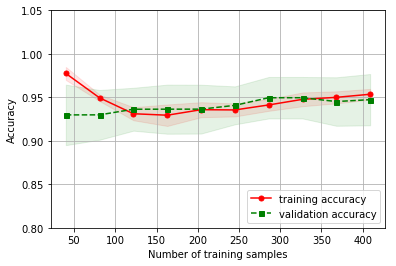

In [125]:
plot_learning_curve(pipe_nn_6, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), ylim=[0.8, 1.05])

C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-pa

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

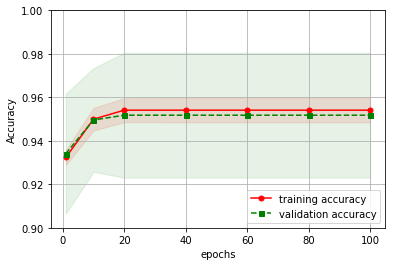

In [129]:
param_name_nn1 = 'nn__max_iter' 
param_range_nn1 = [1, 10, 20, 40, 60, 80, 100]
plot_validation_curve(pipe_nn_6, X_train, y_train, param_name_nn1, param_range_nn1, "epochs", [0.9, 1.00])

C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-pa

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

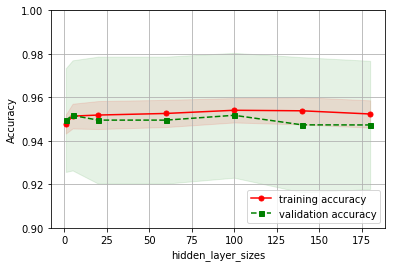

In [130]:
param_name_nn2 = 'nn__hidden_layer_sizes' 
param_range_nn2 = [1, 5, 20, 60, 100, 140, 180] 
plot_validation_curve(pipe_nn_6, X_train, y_train, param_name_nn2, param_range_nn2, "hidden_layer_sizes", [0.9, 1.00])

C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Eric Liao\Anaconda3\lib\site-pa

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric Liao\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

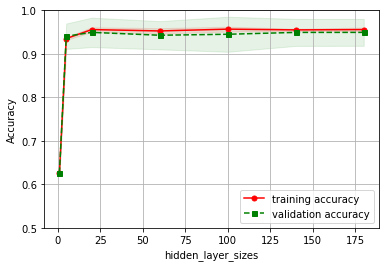

In [132]:
param_name_nn2 = 'nn__hidden_layer_sizes' 
param_range_nn2 = [1, 5, 20, 60, 100, 140, 180] 
plot_validation_curve(pipe_nn_1, X_train, y_train, param_name_nn2, param_range_nn2, "hidden_layer_sizes", [0.5, 1.00])

Querying with the best model took 0.000978 seconds.
114
[[71  1]
 [ 4 38]]


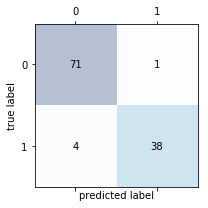

Precision: 0.974
Recall: 0.905
F1: 0.938
ROC AUC: 0.945
Accuracy: 0.956
-----------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97        72
          1       0.97      0.90      0.94        42

avg / total       0.96      0.96      0.96       114



In [133]:
evaluation(pipe_nn_6, X_test, y_test)


In [2]:
import matplotlib.pyplot as plt


In [6]:
print('matplotlib version', plt.__version__)

AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'